## Heart Attack Analysis & Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project aims to understand how the risk of a heart attack is influenced by various clinical and demographic factors such as age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, and exercise-induced angina.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data
- The data consists of 14 column and 303 rows.

### 2.1 Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Read the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/heart.csv')

#### Show Top 10 Records

In [3]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
rows, cols = df.shape
print(f'Dataset Shape:\nNumber of Samples are: {rows}, and number of Features are: {cols}')

Dataset Shape:
Number of Samples are: 303, and number of Features are: 14


### 2.2 Dataset information

- age: Age of the patient  
- sex: Gender of the person -> (0, 1)
- cp: Chest pain type -> (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
- trtbps: resting blood pressure (in mm Hg)
- chol: cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl) -> (1 = true; 0 = false)
- restecg: resting electrocardiographic results -> (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalachh: maximum heart rate achieved
- exng: exercise induced angina -> (1 = yes, 0 = no)
- oldpeak: Previous peak
- slp: Slope
- caa: number of major vessels (0-4)
- thall: Thalium Stress Test result
- output: Target variable -> (0 = less chance of heart attack, 1 = more chance of heart attack)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### There are no missing values in the data set.

### 3.2 Check Duplicates

In [6]:
# Count duplicates
print("Number of duplicate rows:", df.duplicated().sum())


Number of duplicate rows: 1


Display the Duplicate Rows:

In [7]:
duplicates = df[df.duplicated()]
display(duplicates)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Removing the duplicates

In [8]:
df.drop_duplicates(keep='first', inplace=True)

### 3.3 Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


#### Insights:
1. **Age:** The patients in the dataset have a mean age of 54.4 years, with a range from 29 to 77 years, indicating a focus on middle-aged to older adults, often at higher risk for heart disease.

2. **Sex:** The mean value of 0.68 suggests that approximately 68% of patients are male (coded as 1), which could reflect a higher prevalence of heart disease risk factors among men in this group.

3. **Chest Pain Type (cp):** This feature has a mean of 0.96, with chest pain types ranging from 0 to 3. The median (1.0) indicates that the most common types are those closer to the lower end of this range, likely suggesting mild to moderate pain types are prevalent.

4. **Resting Blood Pressure (trtbps):** The average blood pressure is around 131 mm Hg, with a standard deviation of 17.6. A range from 94 to 200 mm Hg indicates diverse patient health statuses, with some likely showing hypertension, a known risk factor for heart issues.

5. **Cholesterol (chol):** Cholesterol levels average around 246.5 mg/dL with a high standard deviation (51.75). The maximum cholesterol level of 564 suggests some patients may have very high cholesterol, which could contribute to elevated cardiovascular risk.

6. **Fasting Blood Sugar (fbs):** Only about 15% of patients have fasting blood sugar levels over 120 mg/dL, indicating a relatively low incidence of high fasting blood sugar, a risk factor associated with diabetes and heart disease.

7. **Resting ECG Results (restecg):** The mean and quartiles suggest that most patients have normal or minor abnormalities in their resting ECG.

8. **Maximum Heart Rate Achieved (thalachh):** The average maximum heart rate is 149.6 bpm, with a fairly broad range, indicating varying levels of cardiovascular fitness and potentially, different levels of heart stress tolerance.

9. **Exercise Induced Angina (exng):** About 33% of patients experience exercise-induced angina, often an indicator of restricted blood flow to the heart.

10. **ST Depression (oldpeak):** The mean value for ST depression (1.04) suggests mild ischemia in some patients, although values as high as 6.2 indicate severe cases in the dataset.

11. **Slope of the Peak Exercise ST Segment (slp):** The slope values suggest varied exercise response patterns, which could provide information on heart health.

12. **Number of Major Vessels (caa):** With a mean close to 0.7, this indicates that a number of patients show visible coronary artery issues, affecting blood flow.

13. **Thalassemia (thall):** The mean value (2.31) suggests a majority of patients may have normal blood flow, but some show fixed or reversible defects, which can impact oxygen delivery to the heart.

14. **Output:** The target variable has a mean of 0.54, suggesting that about 54% of patients experienced the outcome (e.g., heart attack), indicating a roughly balanced dataset that could be valuable for binary classification.

### 3.6 Exploring Data

In [12]:
# define numerical & categorical columns and target
numeric_features = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categorical_features = ["sex", "exng", "caa", "cp", "fbs", "restecg", "slp", "thall"]
target = ["output"]

# print columns
print('We have {} numerical features:\n{}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features:\n{}'.format(len(categorical_features), categorical_features))
print("\nThe target variable is: ", target)

We have 5 numerical features:
['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

We have 8 categorical features:
['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']

The target variable is:  ['output']


### 4. Exploring Data ( Visualization )

#### Single varaible analysis

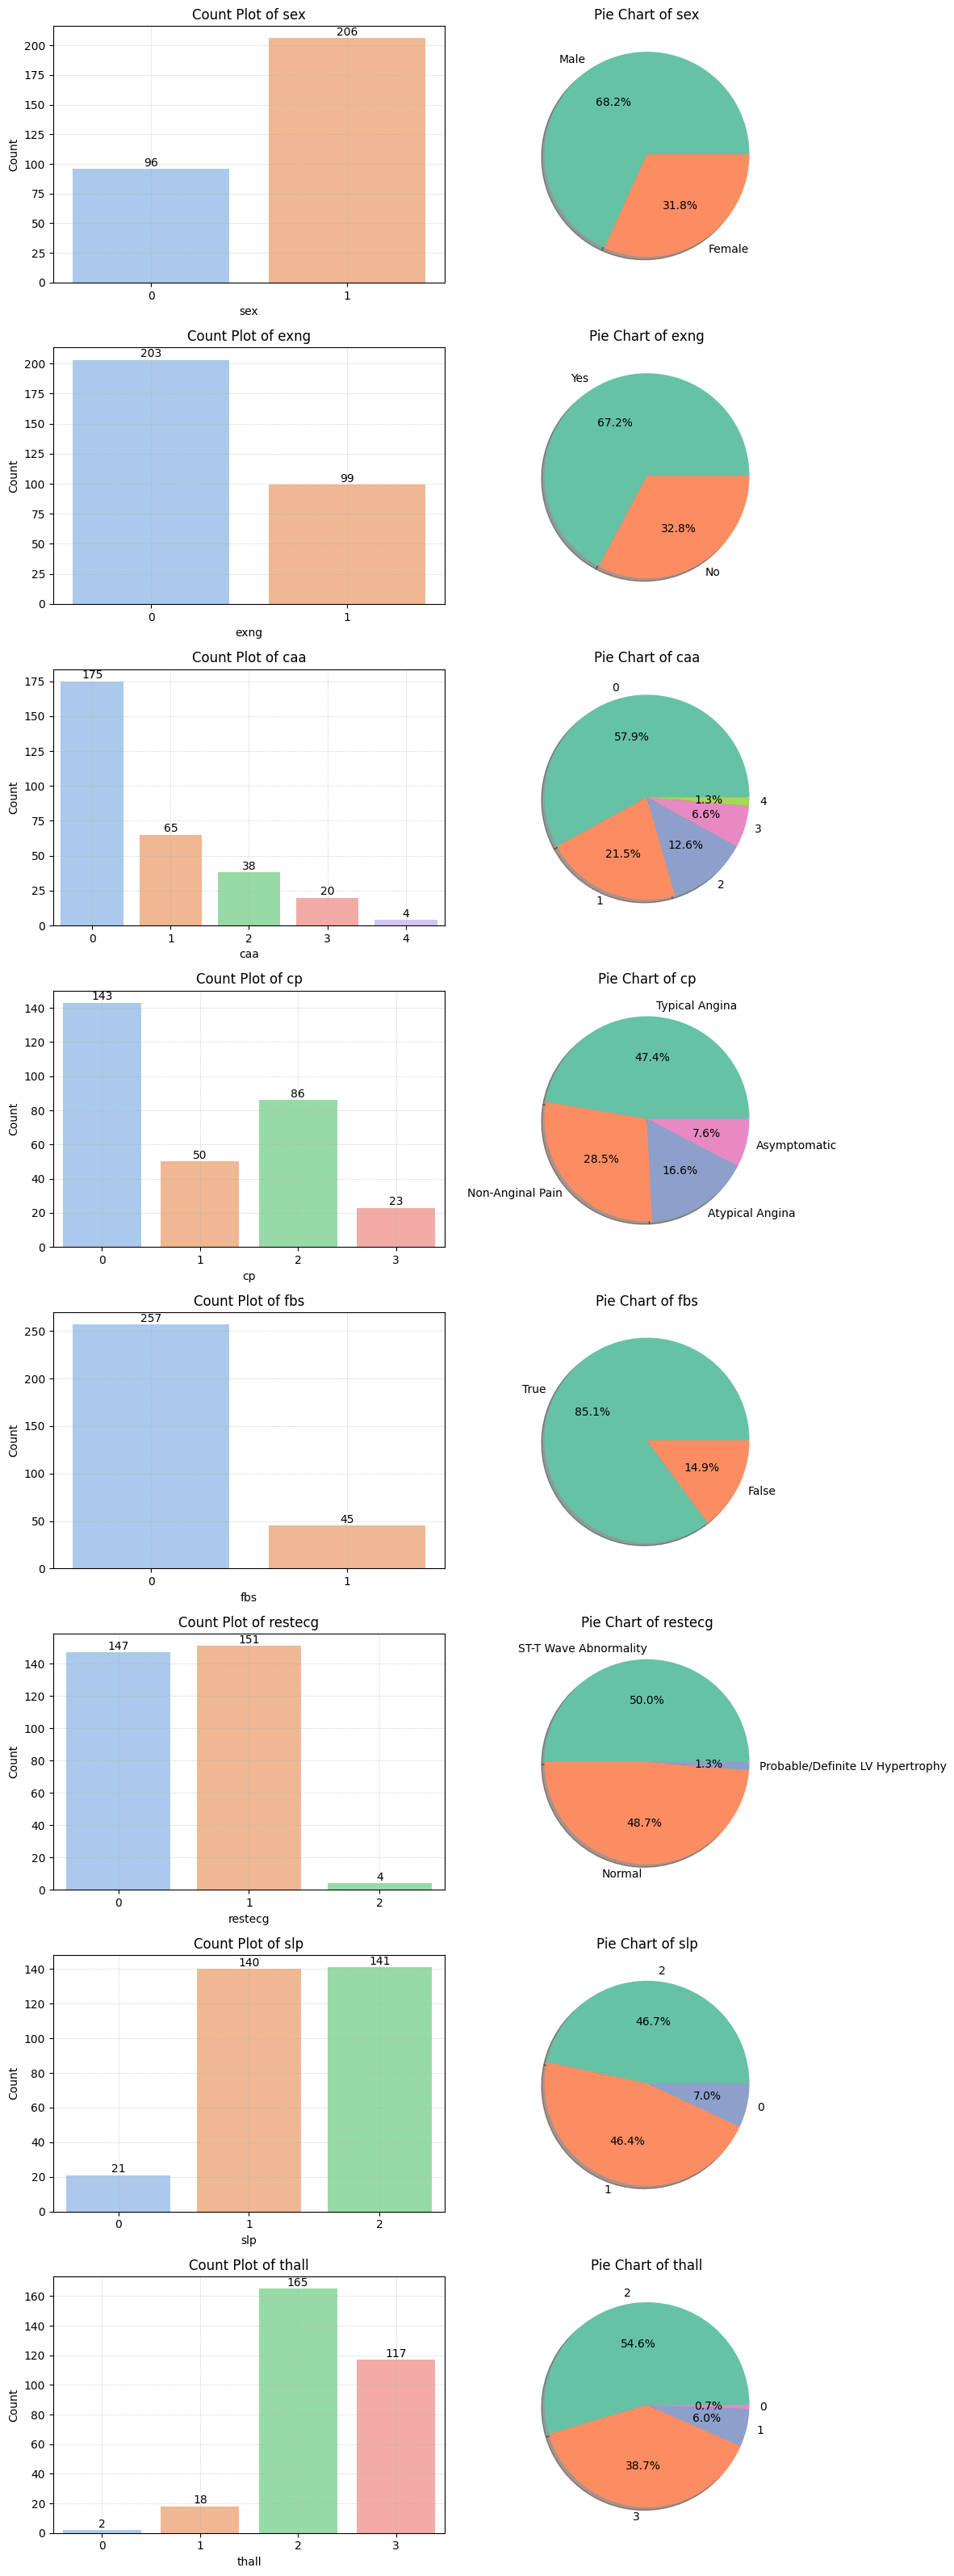

In [48]:
cat_dic = {
    "sex": [ 'Female', 'Male'],
    "exng": ['Yes', 'No'], 
    "caa": ['0', '1', '2', '3', '4'],
    "cp": ['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], 
    "fbs": ['True', 'False'],
    "restecg": ['Normal', 'ST-T Wave Abnormality', 'Probable/Definite LV Hypertrophy'],
    "slp": ['0', '1', '2', '3'],
    "thall": ['0', '1', '2'],
}

fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 32))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Countplot on the left (first column)
    sns.countplot(data=df, x=feature, hue=feature, ax=axes[i * 2], palette="pastel", legend=False)
    axes[i * 2].set_title(f"Count Plot of {feature}")
    axes[i * 2].set_xlabel(feature)
    axes[i * 2].set_ylabel("Count")
    axes[i * 2].grid(visible=True, linestyle=':', linewidth=0.5)

    # Add count annotations on top of each bar
    for p in axes[i * 2].patches:
        count = int(p.get_height())
        axes[i * 2].text(p.get_x() + p.get_width() / 2, count + 0.2, count, 
                         ha="center", va="bottom", fontsize=10, color="black")

    # Pie chart on the right (second column)
    value_counts = df[feature].value_counts()
    
    labels = [cat_dic[feature][int(k)] if int(k) < len(cat_dic[feature]) else str(k) for k in value_counts.index] 
    axes[i * 2 + 1].pie(value_counts, labels=labels, colors=sns.color_palette("Set2"),autopct='%1.1f%%',shadow=True,)
    axes[i * 2 + 1].set_title(f"Pie Chart of {feature}")

plt.tight_layout()
plt.show()


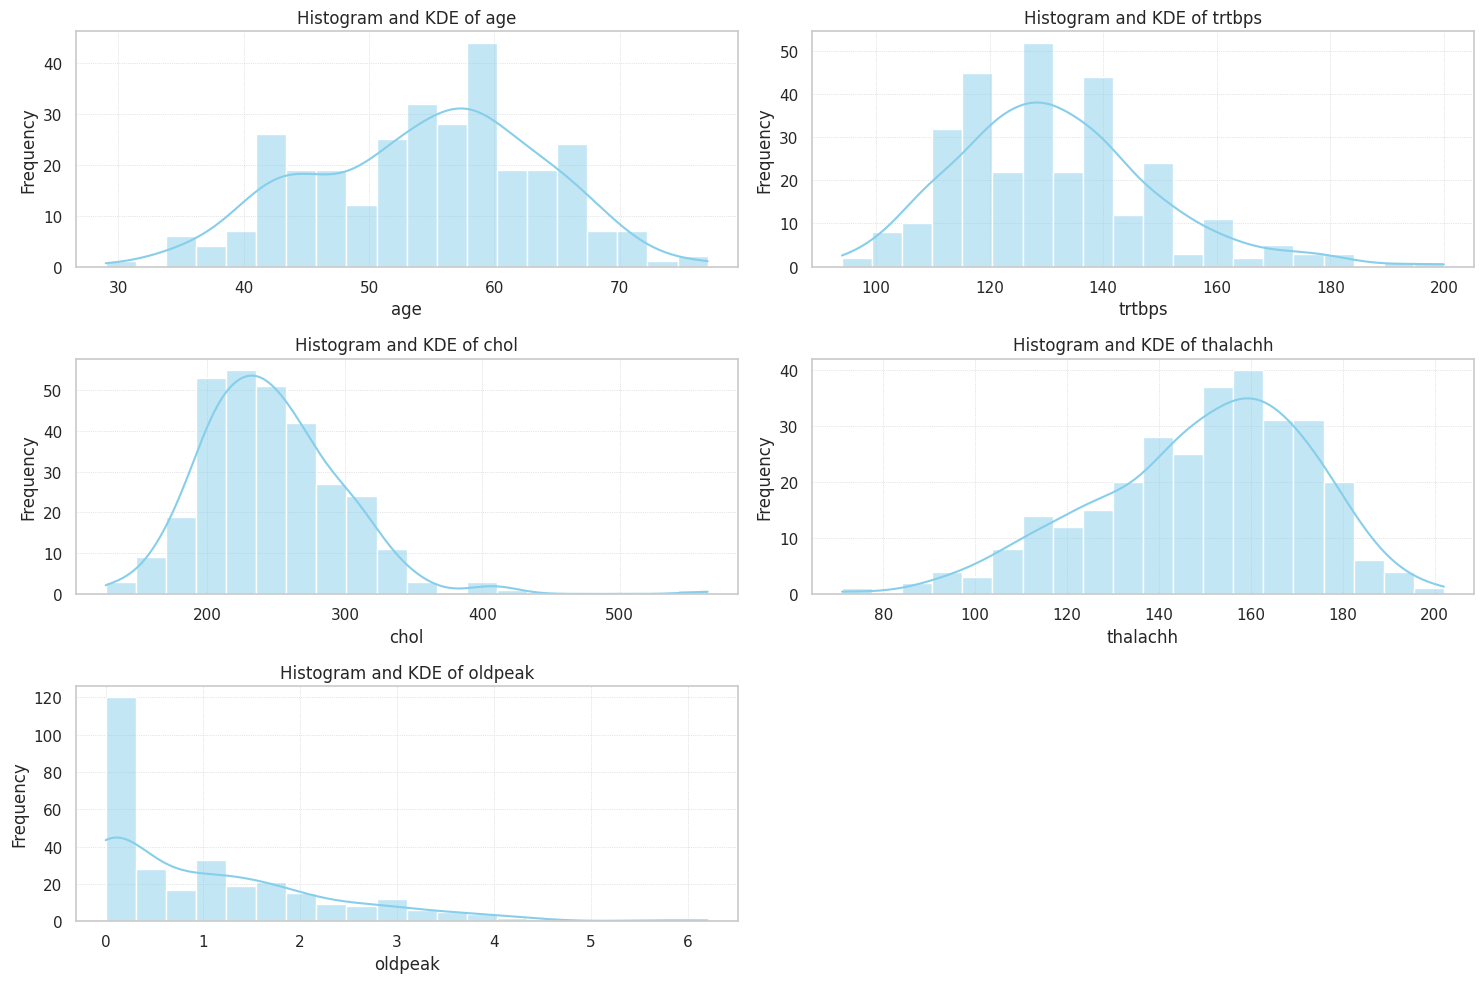

In [113]:
sns.set(style="whitegrid")

# Univariate Analysis: Histograms and KDE for each features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.histplot(df[feature], kde=True, ax=axes[i], color="skyblue", bins=20)
    axes[i].set_title(f"Histogram and KDE of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")
    axes[i].grid(visible=True, linestyle=':', linewidth=0.5)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

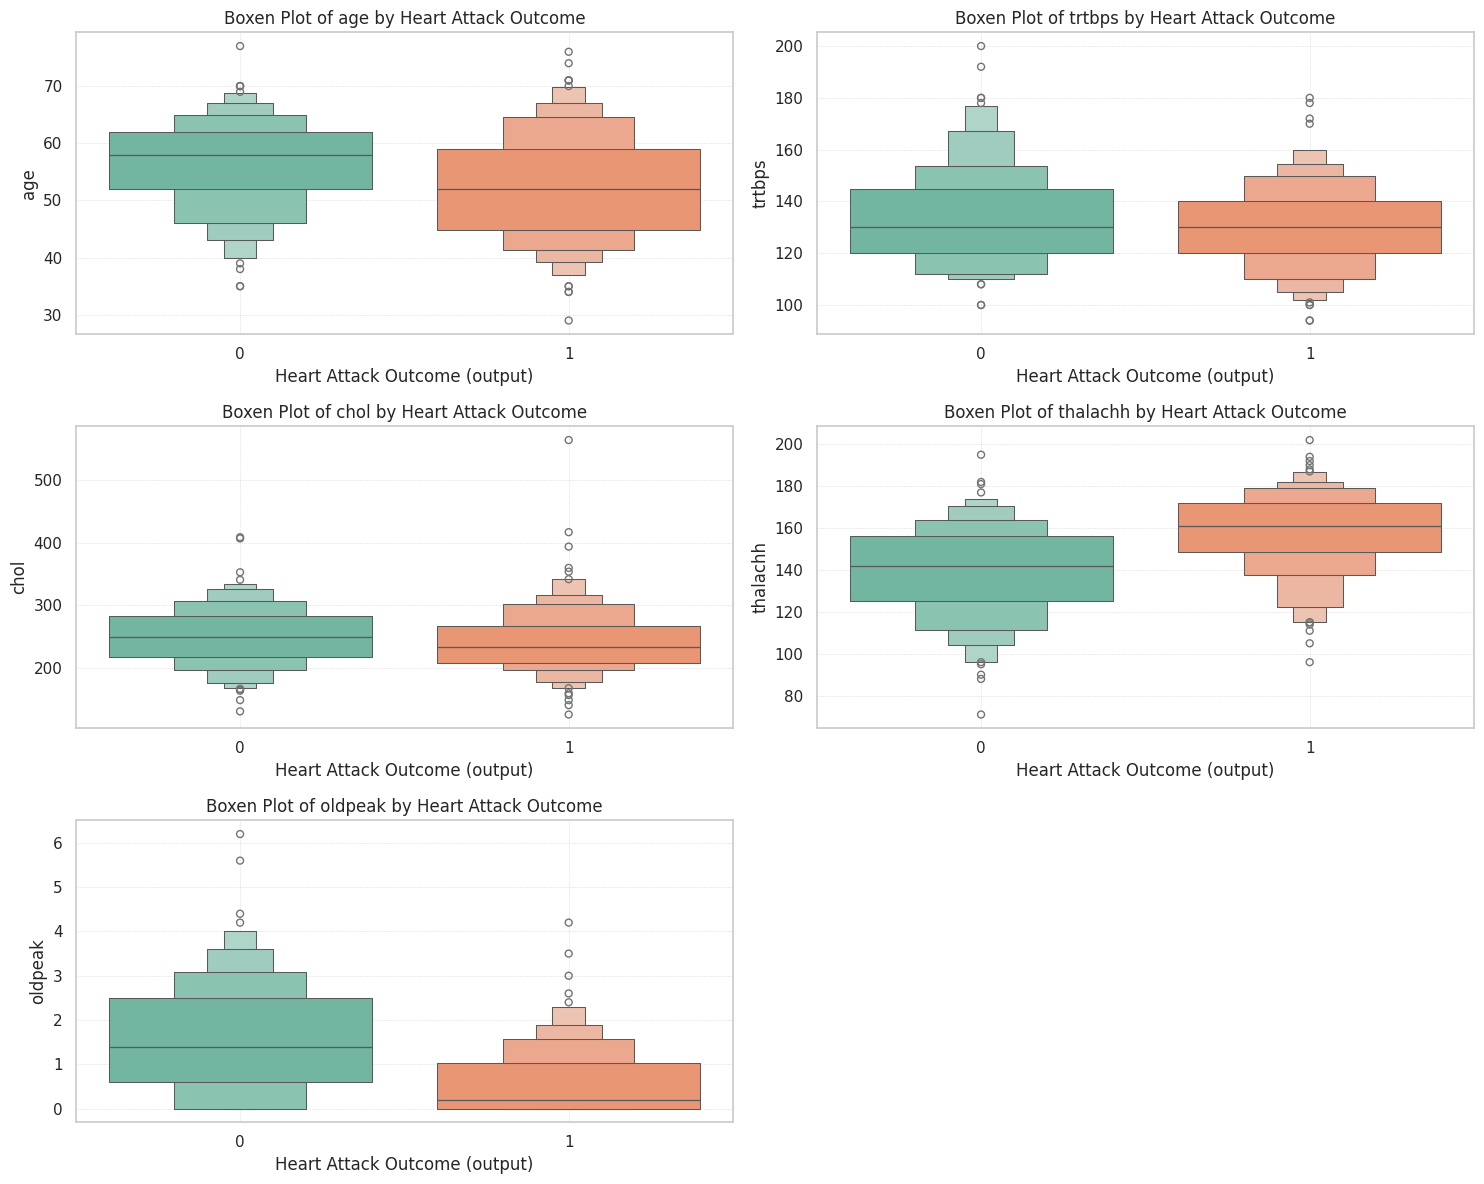

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.boxenplot(data=df, x='output', hue='output', y=feature, ax=axes[i], palette="Set2", legend=False)
    axes[i].set_title(f"Boxen Plot of {feature} by Heart Attack Outcome")
    axes[i].set_xlabel("Heart Attack Outcome (output)")
    axes[i].set_ylabel(feature)
    axes[i].grid(visible=True, linestyle=':', linewidth=0.5)

# Hide any extra subplot if there are fewer features than subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

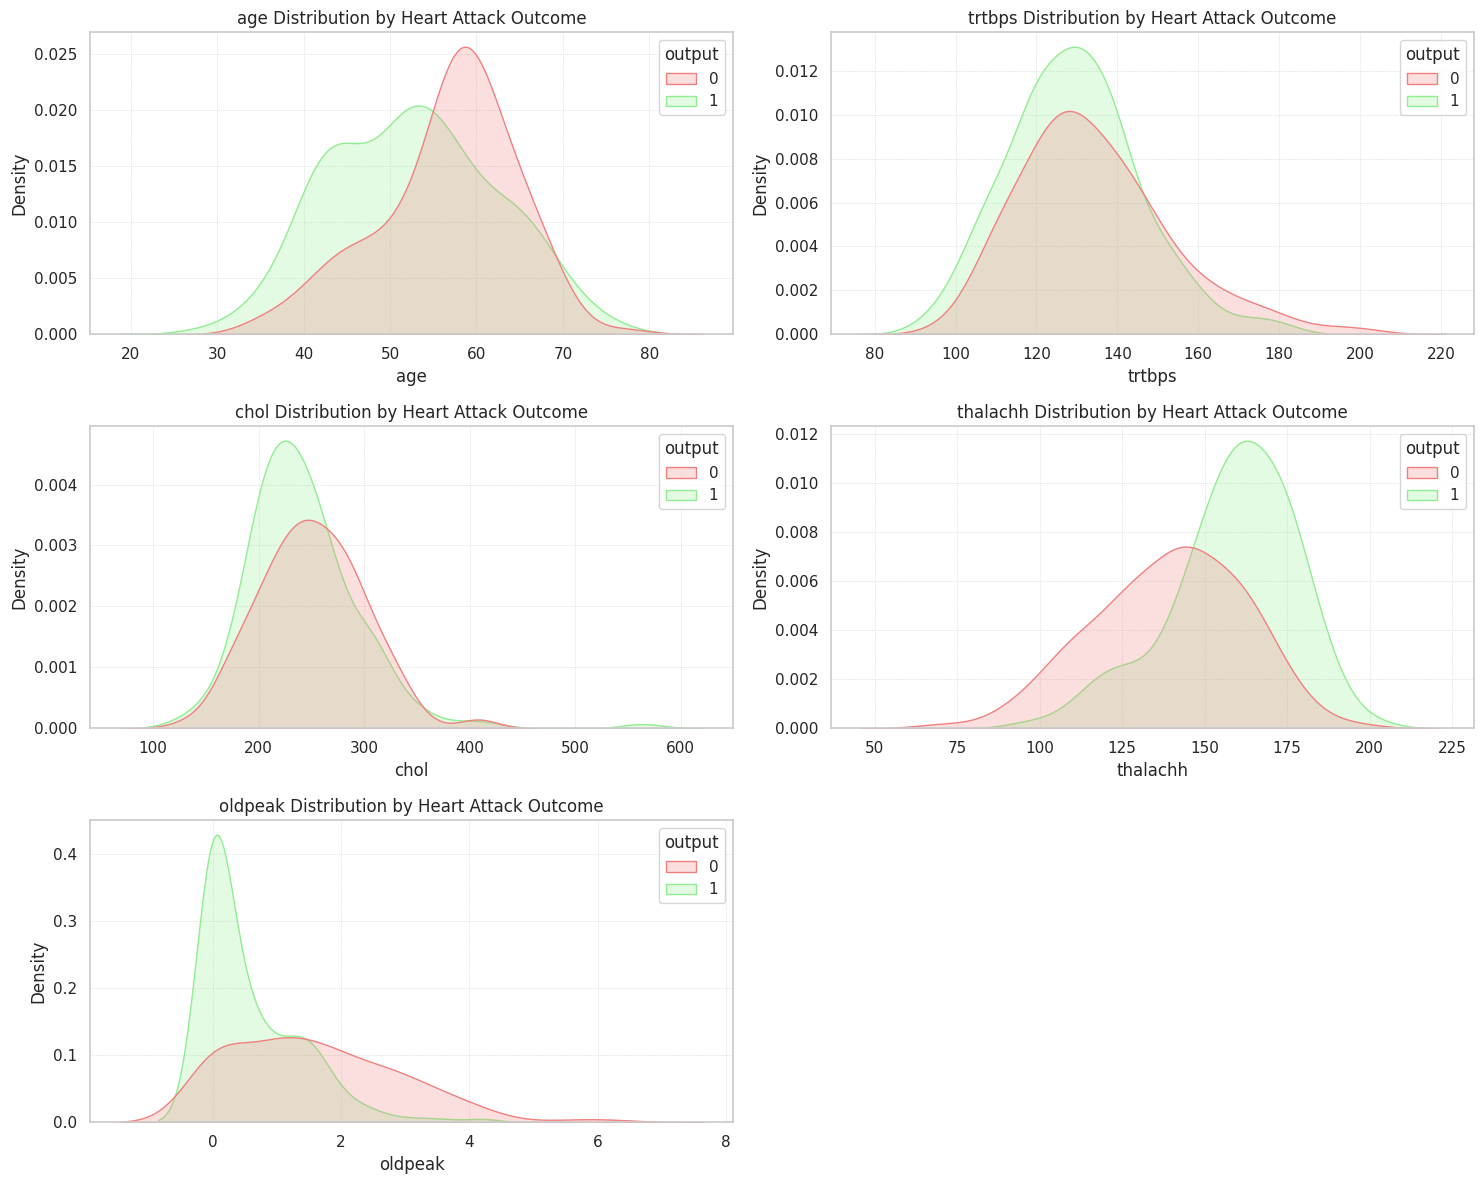

In [114]:
# Distribution of continuous features by target variable
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

for i, feature in enumerate(numeric_features):
    sns.kdeplot(data=df, x=feature, hue='output', fill=True, ax=axes[i], palette=["lightcoral", "lightgreen"])
    axes[i].set_title(f"{feature} Distribution by Heart Attack Outcome")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Density")
    axes[i].grid(visible=True, linestyle=':', linewidth=0.5)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

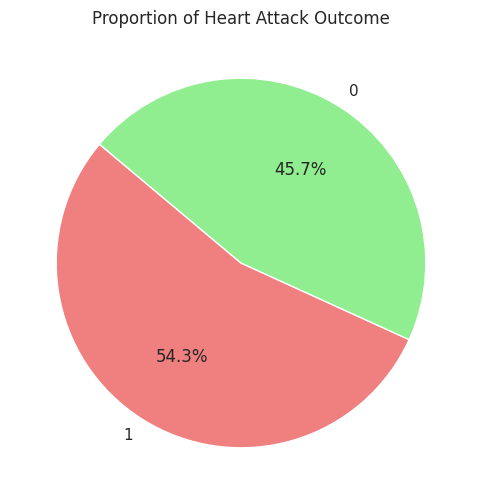

In [86]:
# Bivariate Analysis: Pie plot for target variable distribution
plt.figure(figsize=(8, 6))
df['output'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["lightcoral", "lightgreen"])
plt.title('Proportion of Heart Attack Outcome')
plt.ylabel('')
plt.show()

#### Two Varaibles Analysis

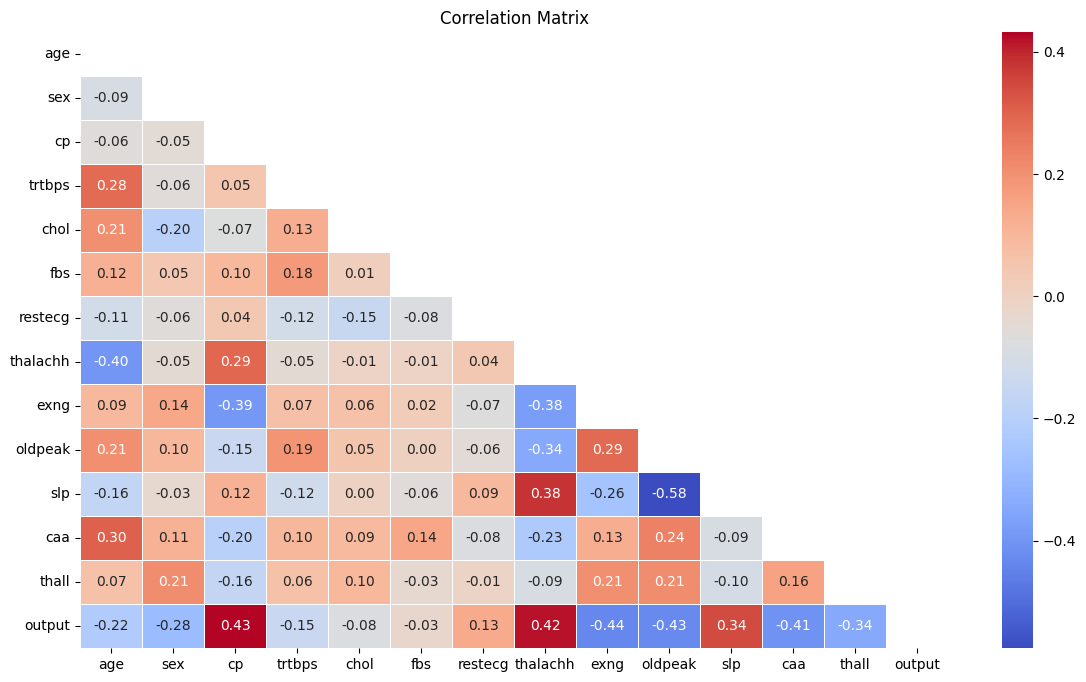

In [20]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=np.triu(corr_matrix))
plt.title("Correlation Matrix")
plt.show()

In [21]:
corr_matrix[['output']].abs().sort_values(by='output')

,output
fbs,0.026826
chol,0.081437
restecg,0.134874
trtbps,0.146269
age,0.221476
sex,0.283609
thall,0.343101
slp,0.343940
caa,0.408992
thalachh,0.419955


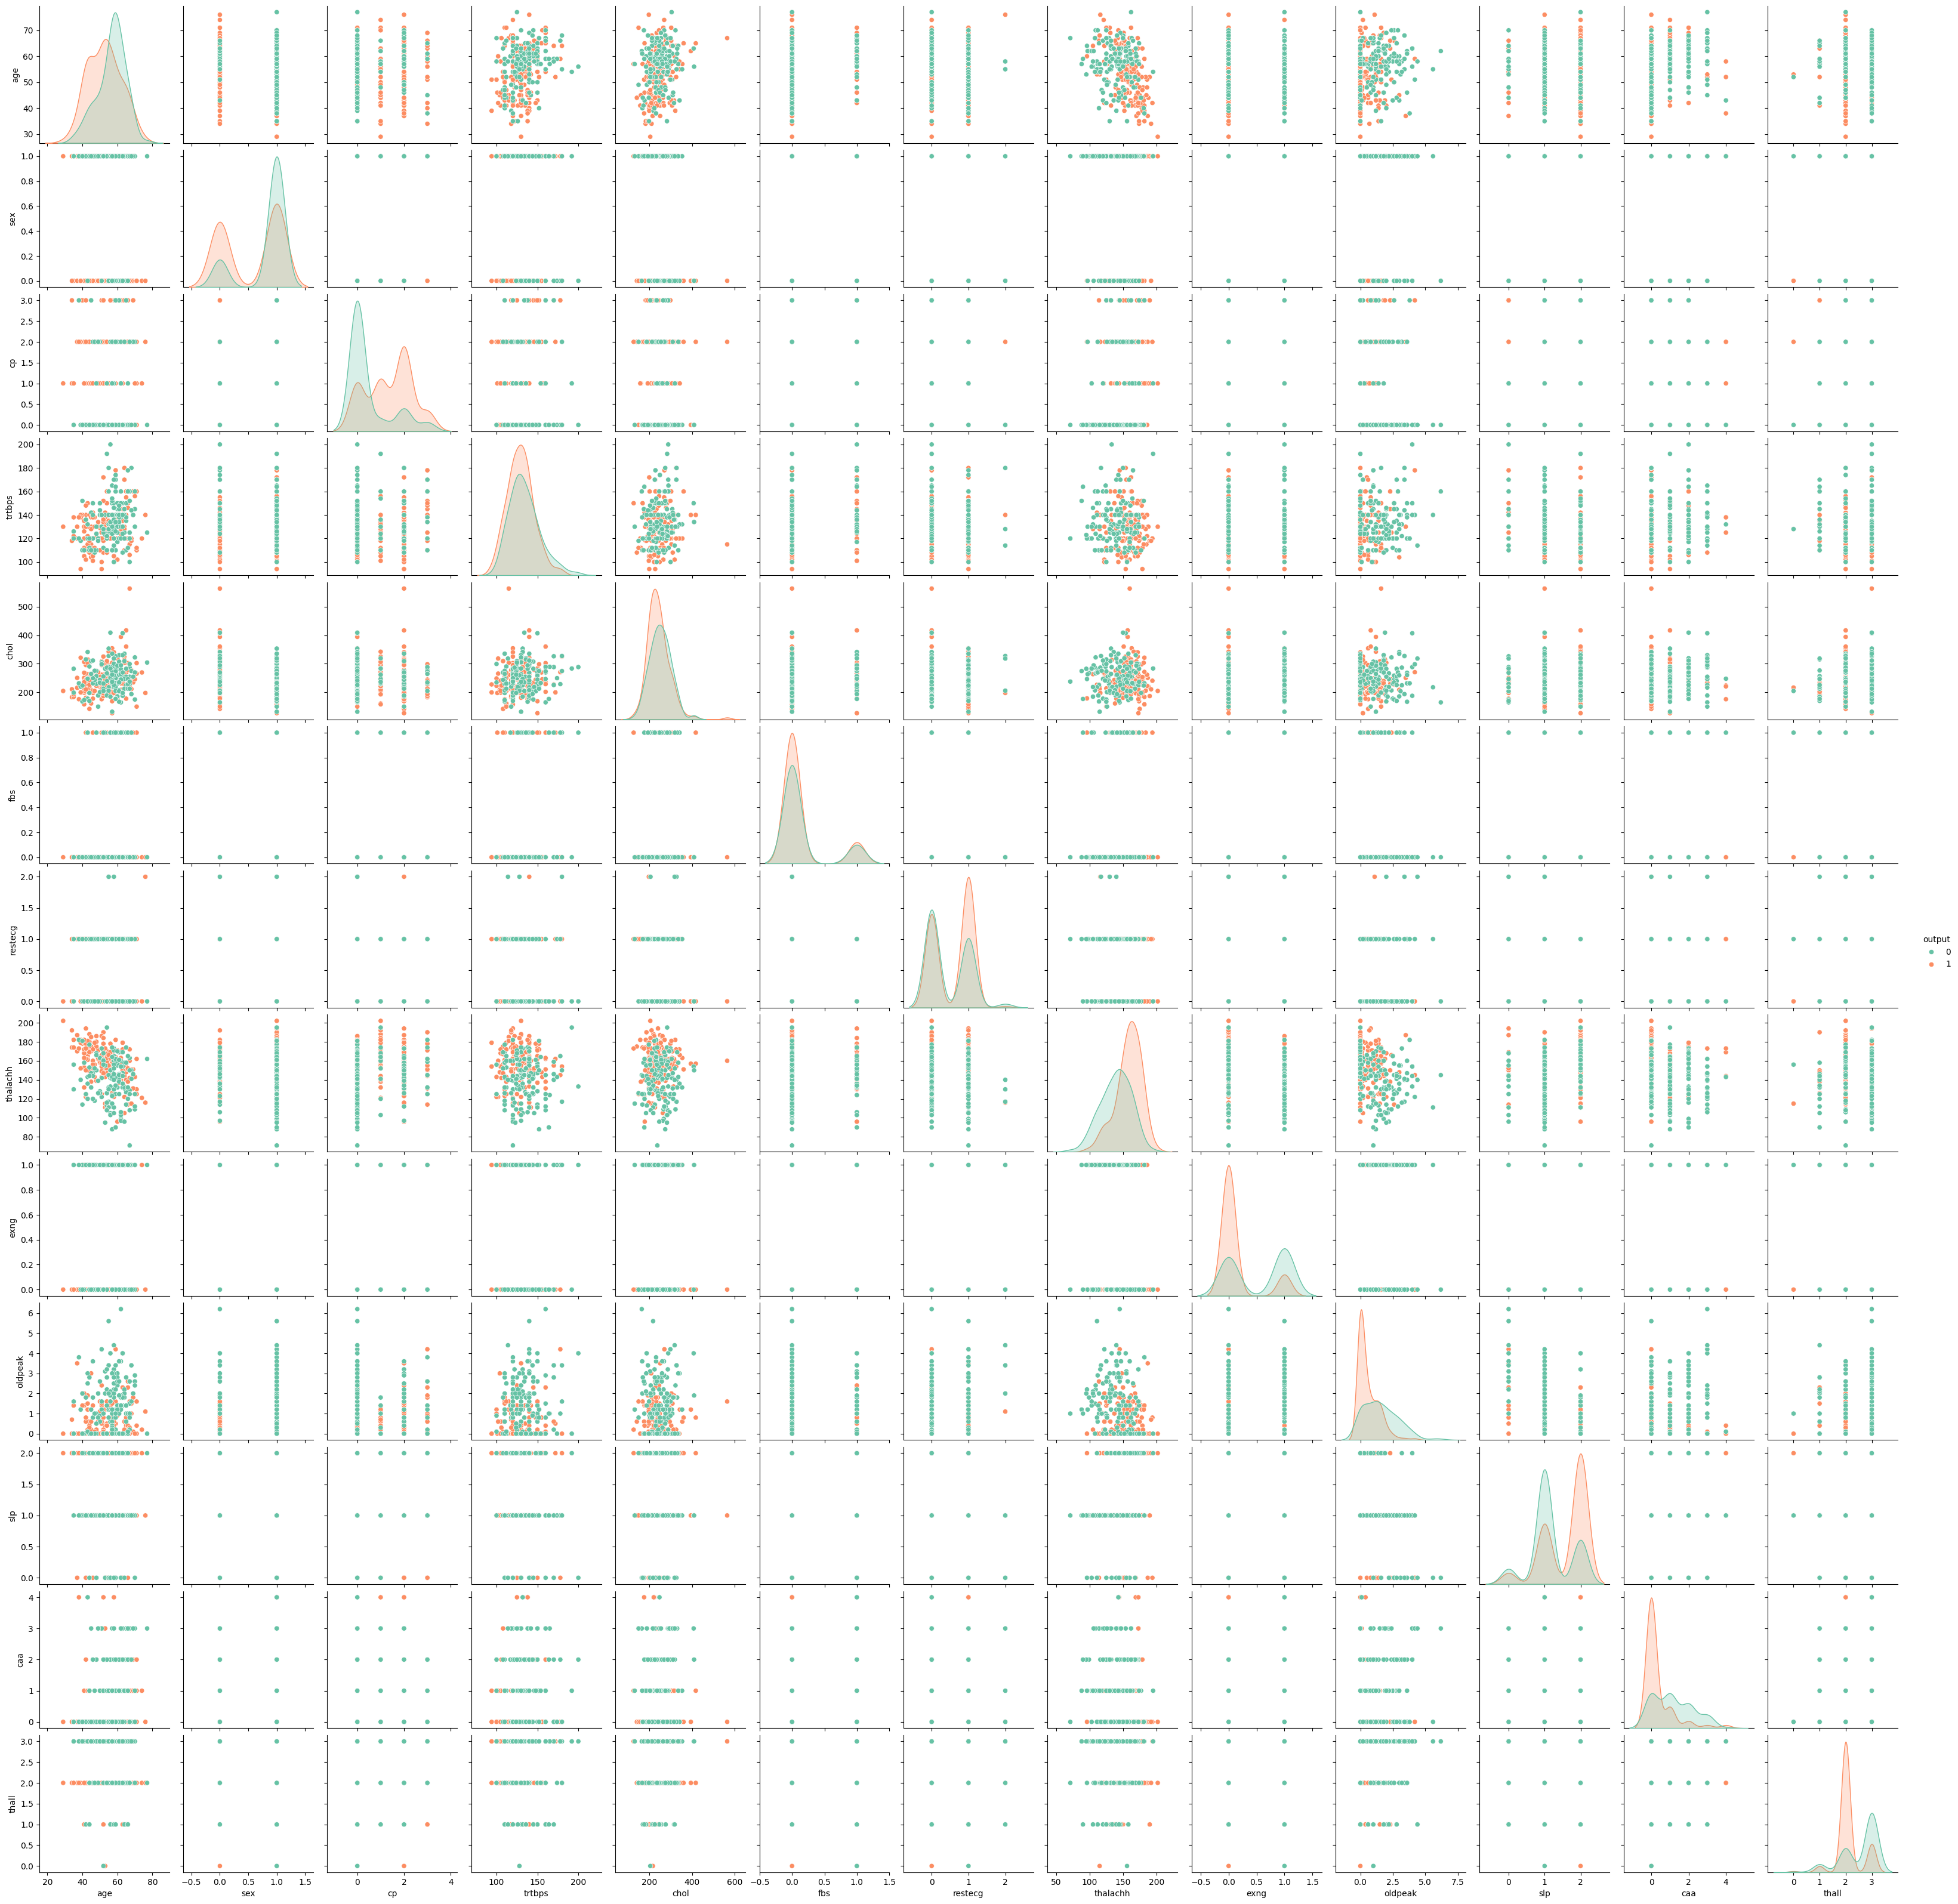

In [23]:
sns.pairplot(df, hue='output', palette='Set2')
plt.show()

#### Exploring the Impact of Gender on Heart Attack Outcomes Across Key Numerical Features

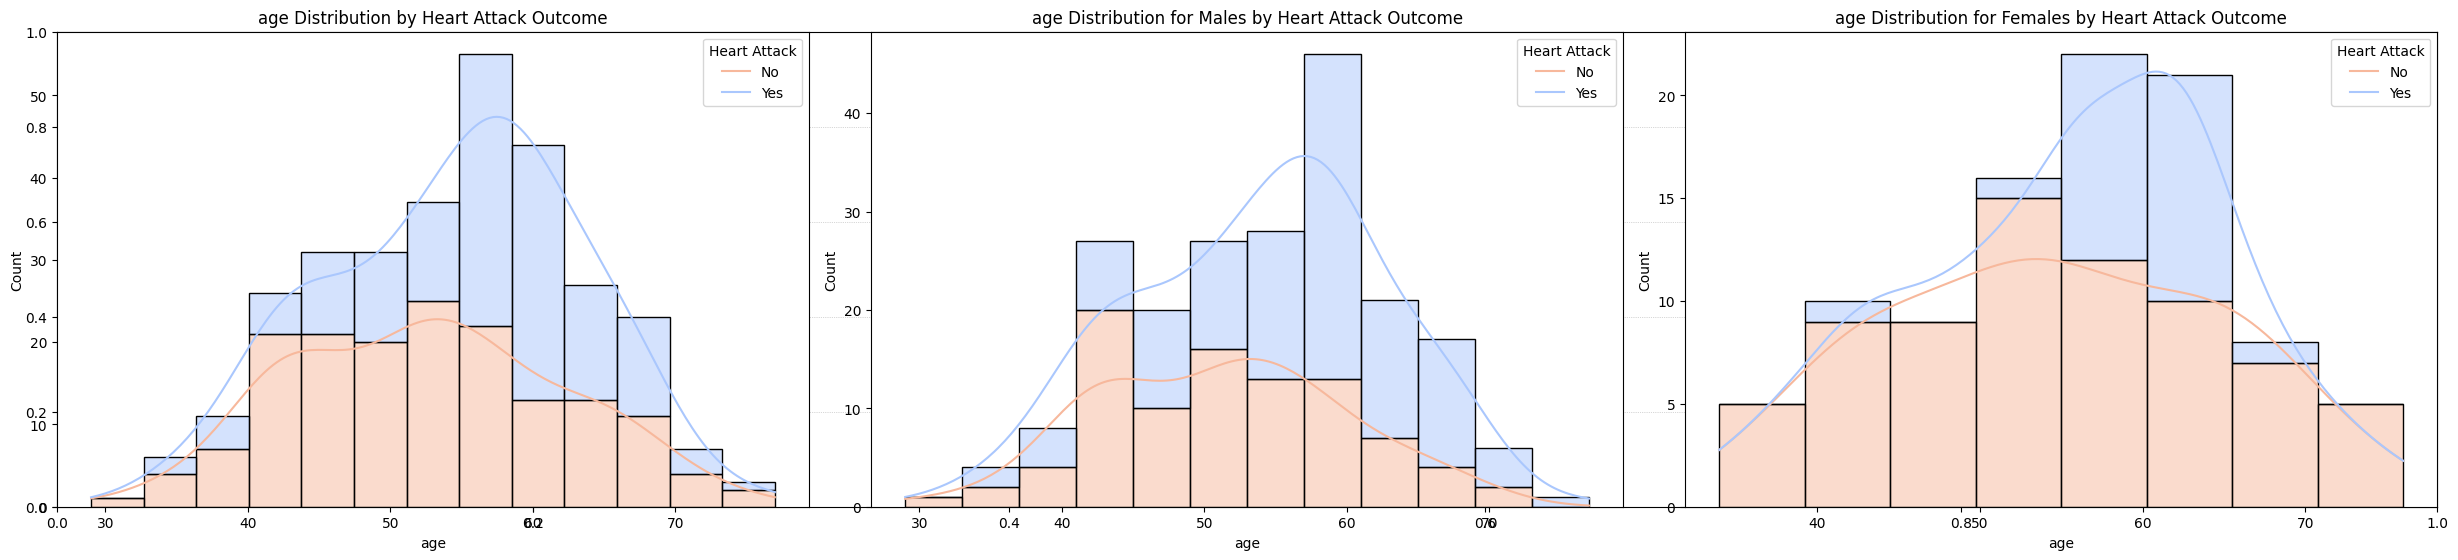

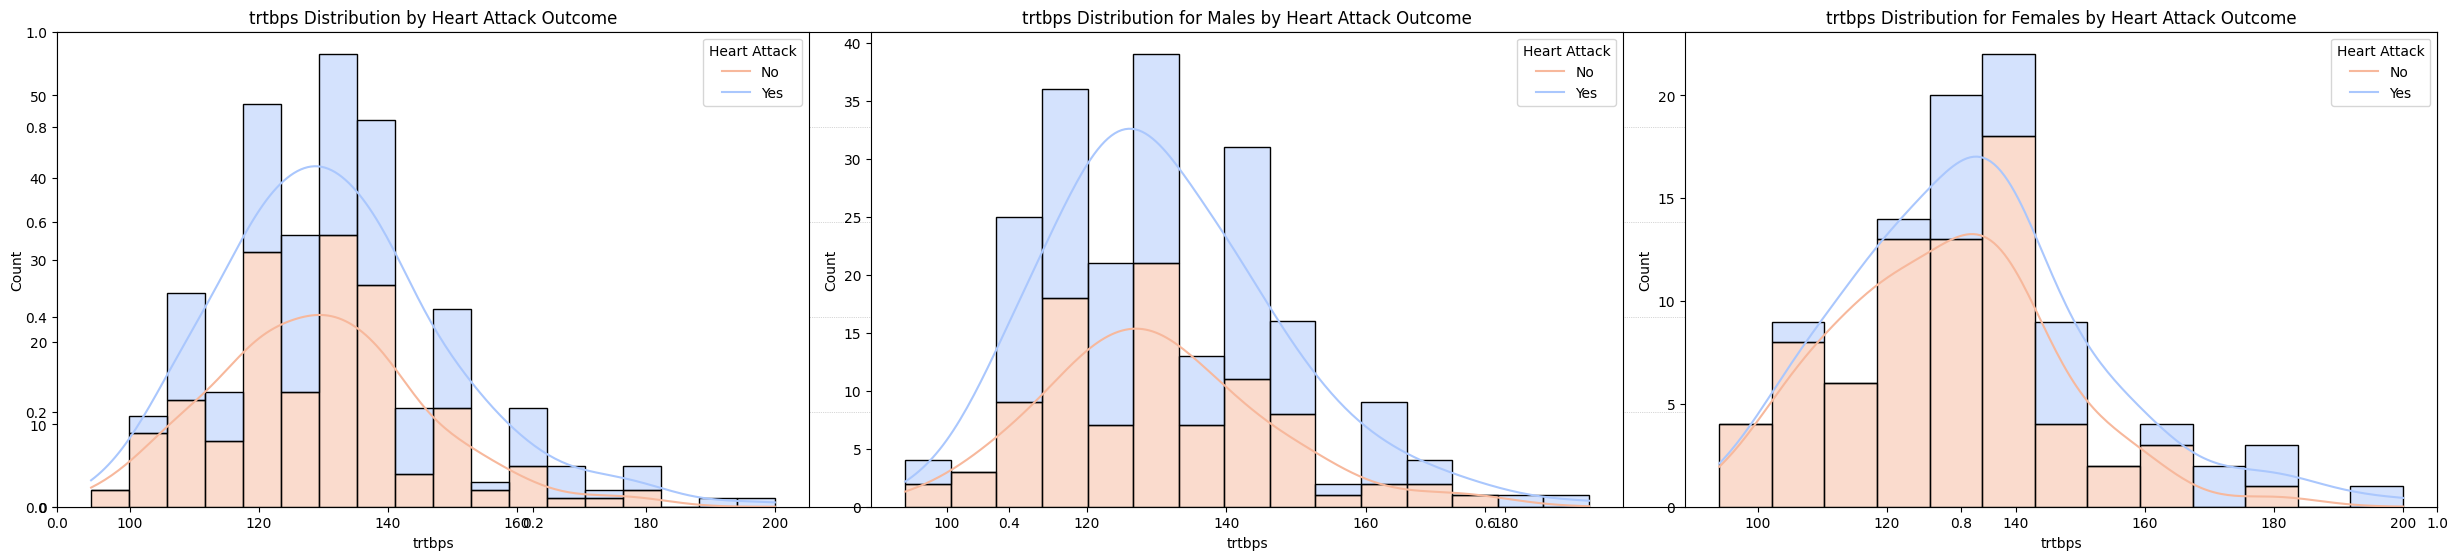

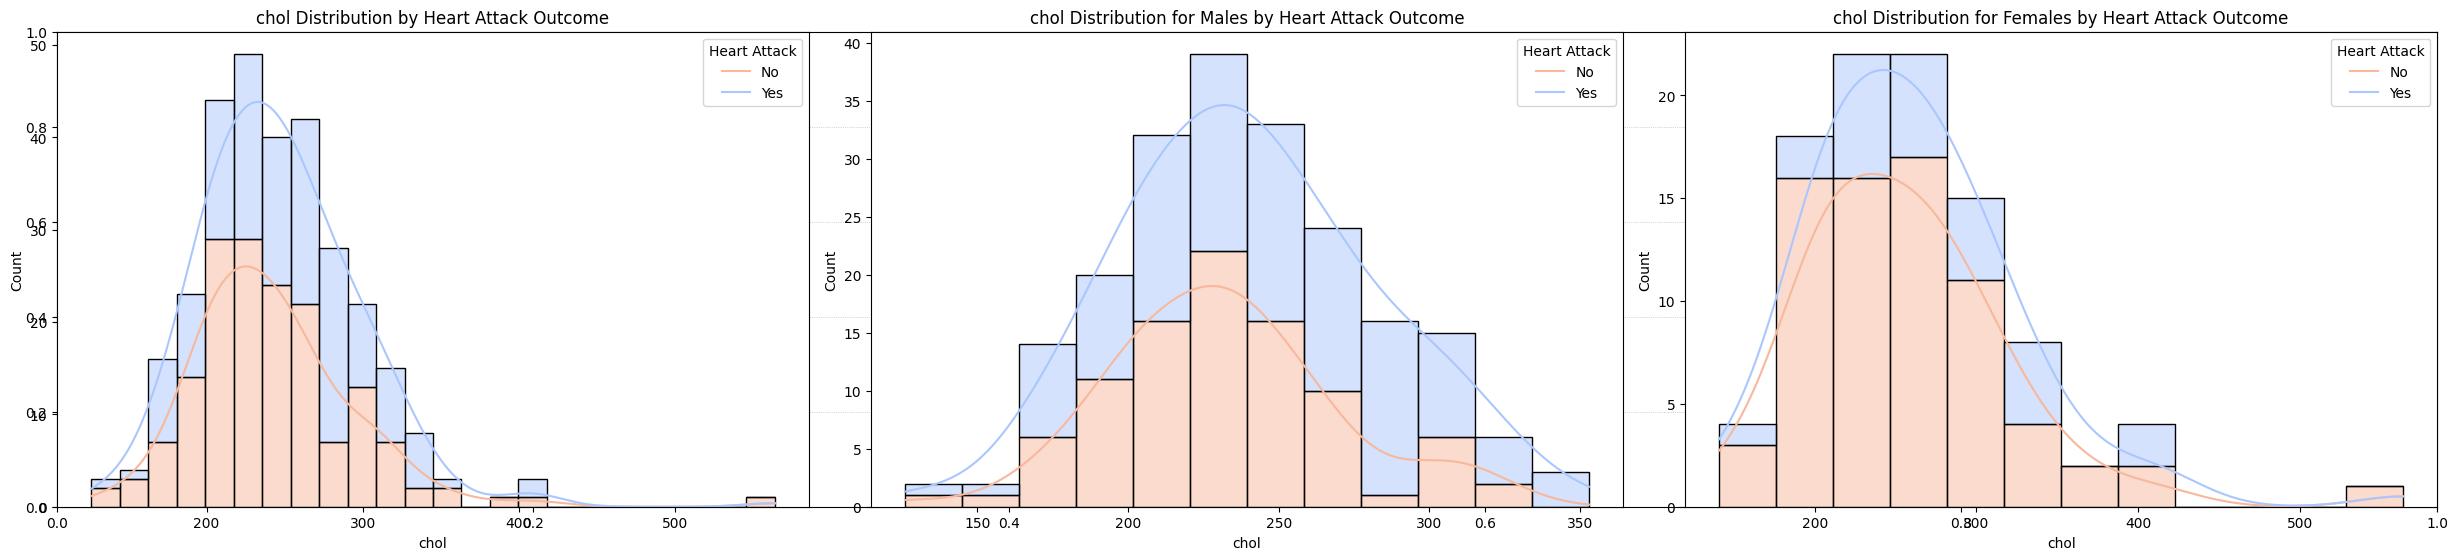

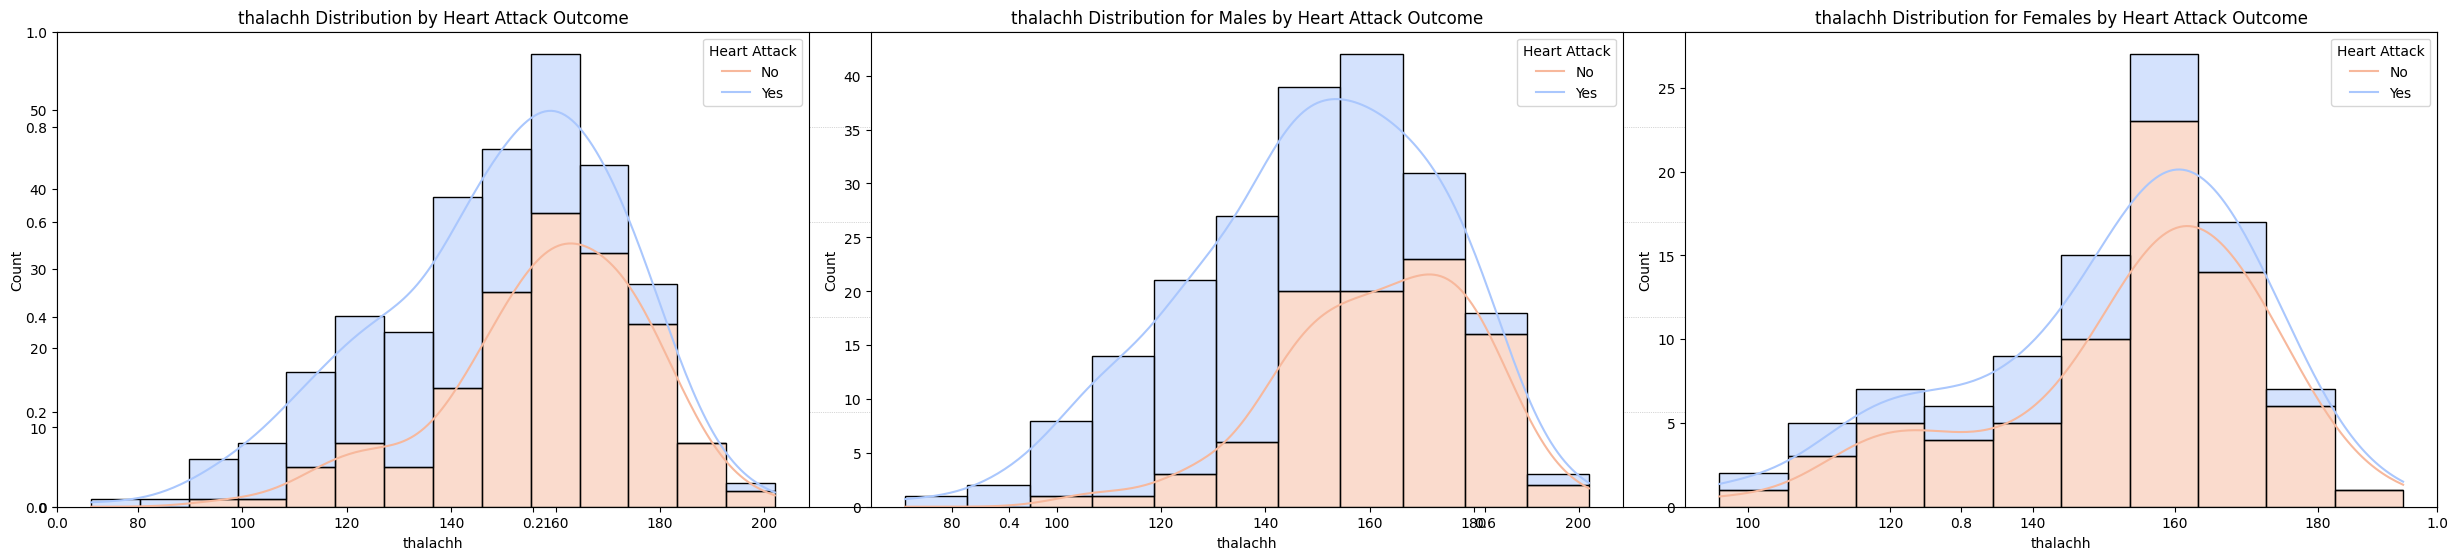

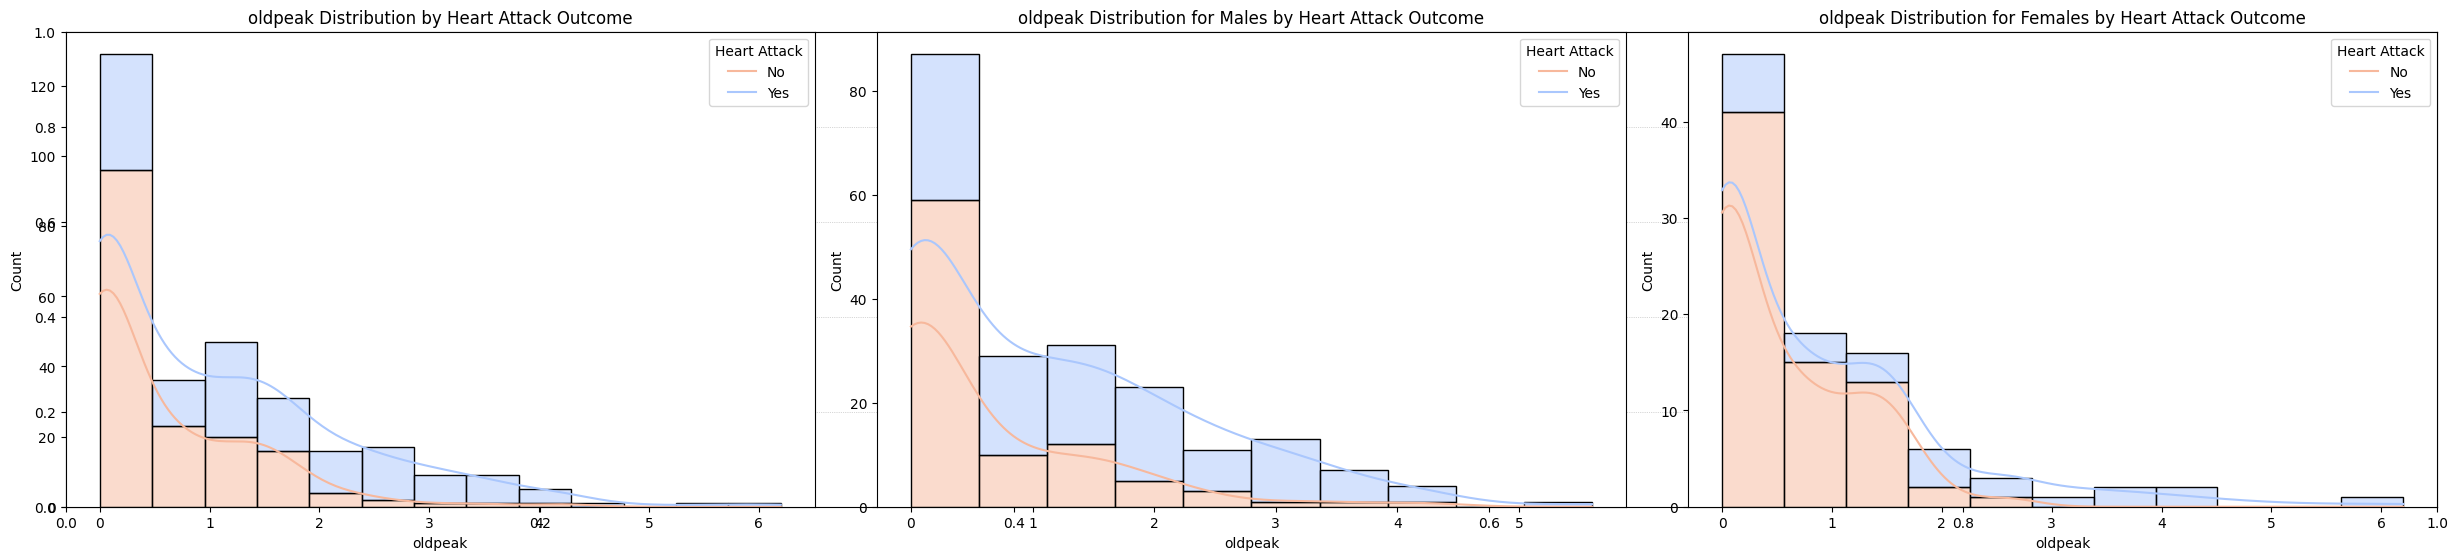

In [28]:
for i, feature in enumerate(numeric_features):
    plt.figure(figsize=(25, 6))

    # 1. Overall feature distribution by heart attack outcome
    plt.subplot(131)
    sns.histplot(data=df, x=feature, kde=True, hue='output', multiple='stack', palette="coolwarm")
    plt.title(f'{feature} Distribution by Heart Attack Outcome')
    plt.xlabel(f'{feature}')
    plt.legend(title='Heart Attack', labels=['No', 'Yes'])

    # 2. Feature distribution for males by heart attack outcome
    plt.subplot(132)
    sns.histplot(data=df[df['sex'] == 1], x=feature, kde=True, hue='output', multiple='stack', palette="coolwarm")
    plt.title(f'{feature} Distribution for Males by Heart Attack Outcome')
    plt.xlabel(f'{feature}')
    plt.legend(title='Heart Attack', labels=['No', 'Yes'])

    # Feature distribution for females by heart attack outcome
    plt.subplot(133)
    sns.histplot(data=df[df['sex'] == 0], x=feature, kde=True, hue='output', multiple='stack', palette="coolwarm")
    plt.title(f'{feature} Distribution for Females by Heart Attack Outcome')
    plt.xlabel(f'{feature}')
    plt.legend(title='Heart Attack', labels=['No', 'Yes'])

    plt.tight_layout()
    plt.show()